In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans,AgglomerativeClustering,MeanShift
from  sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
path='/sgmimage/1.bmp'
path2='/sgmimage/2.bmp'
path3='/sgmimage/test.bmp'
pathGT_1='/sgmimage/1_GT.bmp'
pathGT_2='/sgmimage/2_GT.bmp'

imagecv=cv.imread(path)
imagecv2=cv.imread(path2)
imageTest=cv.imread(path3)

imageGT_1=cv.imread(pathGT_1)
imageGT_2=cv.imread(pathGT_2)

In [ ]:
imgg=imagecv.reshape(113232,3)
imgg2=imagecv2.reshape(113232,3)
imageTest=imageTest.reshape(113232,3)


In [ ]:
kmeans=KMeans(n_clusters=2).fit(imgg)
print(kmeans.labels_)

[1 1 1 ... 1 1 1]


In [ ]:
kmeans2=KMeans(n_clusters=2).fit(imgg2)
print(kmeans2.labels_)

[0 0 0 ... 0 0 0]


In [ ]:
kmeans3=KMeans(n_clusters=2).fit(imageTest)
print(kmeans3.labels_)

[0 1 1 ... 1 1 1]


In [ ]:
oo=kmeans.labels_.reshape(337, 336)
oo2=kmeans2.labels_.reshape(337, 336)
oo3=kmeans3.labels_.reshape(337, 336)

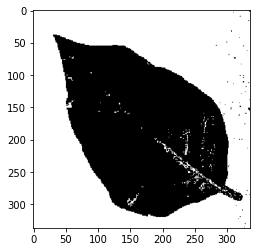

In [ ]:
plt.imshow(oo,cmap="gray")

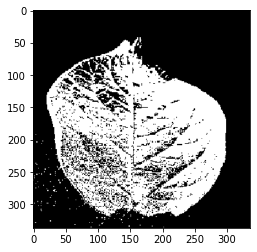

In [ ]:
plt.imshow(oo2,cmap="gray")

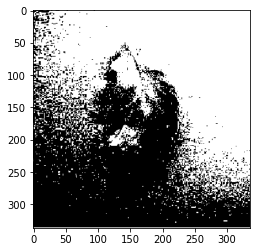

In [ ]:
plt.imshow(oo3,cmap="gray")

In [ ]:
imagecv=cv.imread(path)
imagecv2=cv.imread(path2)
imageTest=cv.imread(path3)


imageGT_1=cv.imread(pathGT_1)
imageGT_2=cv.imread(pathGT_2)

imageGT_1 = cv.cvtColor(imageGT_1, cv.COLOR_BGR2GRAY)
imageGT_2 = cv.cvtColor(imageGT_2, cv.COLOR_BGR2GRAY)
imageGT_1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
imgg=imagecv.reshape(113232,3)
imgg2=imagecv2.reshape(113232,3)
imageGT_11=imageGT_1.reshape(113232,1)
imageGT_22=imageGT_2.reshape(113232,1)
imageTest=imageTest.reshape(113232,3)
imageGT_11

array([[255],
       [255],
       [255],
       ...,
       [255],
       [255],
       [255]], dtype=uint8)

In [ ]:
datafinal=np.concatenate((imgg, imgg2), axis=0)
datafinal.shape

(226464, 3)

In [ ]:
datafinal_labels=np.concatenate((imageGT_11, imageGT_22), axis=0)
datafinal_labels.shape

(226464, 1)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(datafinal, datafinal_labels, test_size=0.3)

In [ ]:
clf = svm.SVC()
clf=clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted = clf.predict(X_test) 

In [ ]:
accuracy=accuracy_score(y_test,predicted)
accuracy

0.9823079187518399

In [ ]:
predicted_test_image = clf.predict(imageTest) 

In [ ]:
predicted_test_image

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

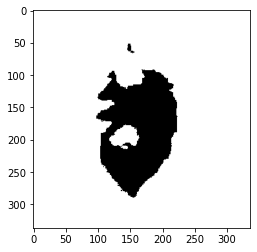

In [ ]:
imagetests=predicted_test_image.reshape(337, 336)
plt.imshow(imagetests,cmap="gray")